In [6]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sn
from IPython.display import display
%matplotlib inline

In [7]:
data = pd.read_csv('soccerdata.csv')

display(data.head())
display(data.columns)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,11/08/17,Arsenal,Leicester,4,3,H,2,2,D,...,2.32,21,-1.00,1.91,1.85,2.10,2.02,1.49,4.73,7.25
1,E0,12/08/17,Brighton,Man City,0,2,A,0,0,D,...,2.27,20,1.50,1.95,1.91,2.01,1.96,11.75,6.15,1.29
2,E0,12/08/17,Chelsea,Burnley,2,3,A,0,3,A,...,2.23,20,-1.75,2.03,1.97,1.95,1.90,1.33,5.40,12.25
3,E0,12/08/17,Crystal Palace,Huddersfield,0,3,A,0,2,A,...,1.72,18,-0.75,2.10,2.05,1.86,1.83,1.79,3.56,5.51
4,E0,12/08/17,Everton,Stoke,1,0,H,1,0,H,...,1.76,19,-0.75,1.94,1.90,2.01,1.98,1.82,3.49,5.42


Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA',
       'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH',
       'BbMxD', 'BbAvD', 'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5',
       'BbMx<2.5', 'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH',
       'BbMxAHA', 'BbAvAHA', 'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [8]:
cols = ['HomeTeam', 'AwayTeam', 'FTR', 'FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF']
data = data.loc[:,cols]

display(data.head())

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HST,AST,HC,AC,HF,AF
0,Arsenal,Leicester,H,4,3,27,6,10,3,9,4,9,12
1,Brighton,Man City,A,0,2,6,14,2,4,3,10,6,9
2,Chelsea,Burnley,A,2,3,19,10,6,5,8,5,16,11
3,Crystal Palace,Huddersfield,A,0,3,14,8,4,6,12,9,7,19
4,Everton,Stoke,H,1,0,9,9,4,1,6,7,13,10


In [9]:
'''
HomeTeam = Home Team
AwayTeam = Away Team
FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)

FTHG = Full Time Home Team Goals
FTAG = Full Time Away Team Goals
HS = Home Team Shots
AS = Away Team Shots
HST = Home Team Shots on Target
AST = Away Team Shots on Target
HC = Home Team Corners
AC = Away Team Corners
HF = Home Team Fouls Committed
AF = Away Team Fouls Committed
'''

goaldiff = np.array(data['FTHG'] - data['FTAG'])
shotdiff = np.array(data['HS'] - data['AS'])
targetdiff = np.array(data['HST'] - data['AST'])
cornerdiff = np.array(data['HC'] - data['AC'])
fouldiff = np.array(data['HF'] - data['AF'])

new_data = {
    "HomeTeam":data['HomeTeam'],
    "AwayTeam":data['AwayTeam'],
    "Result":data['FTR'],
    "Goal Diff":goaldiff,
    "Shot Diff":shotdiff,
    "Target Diff":targetdiff,
    "Corner Diff":cornerdiff,
    "Foul Diff":fouldiff
}

data = pd.DataFrame(new_data)
data = data[['HomeTeam','AwayTeam','Result','Goal Diff','Shot Diff','Target Diff','Corner Diff','Foul Diff']]

display(data.head())

,HomeTeam,AwayTeam,Result,Goal Diff,Shot Diff,Target Diff,Corner Diff,Foul Diff
0,Arsenal,Leicester,H,1,21,7,5,-3
1,Brighton,Man City,A,-2,-8,-2,-7,-3
2,Chelsea,Burnley,A,-1,9,1,3,5
3,Crystal Palace,Huddersfield,A,-3,6,-2,3,-12
4,Everton,Stoke,H,1,0,3,-1,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E1D7746780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E1D9559E10>]], dtype=object)

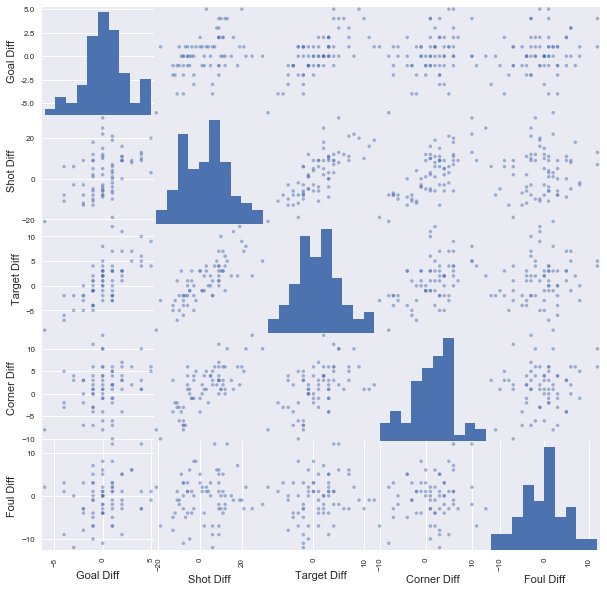

In [10]:
scatter_matrix(data.loc[:,['Goal Diff', 'Shot Diff', 'Target Diff', 'Corner Diff', 'Foul Diff']], figsize=(10,10))